<a href="https://colab.research.google.com/github/TRANQUOCHUY202/AI/blob/main/W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip  install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=20a5c2f6380751a46efbd199011637bf9f2950aa4e9a2fc0b06304ecd61e8240
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
 pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


19.927232635060644


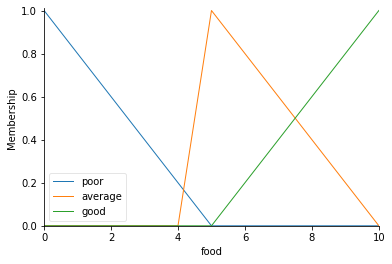

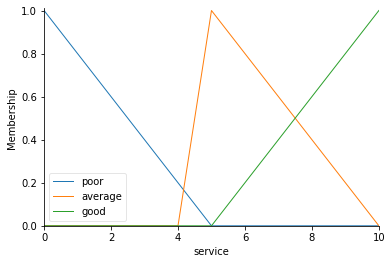

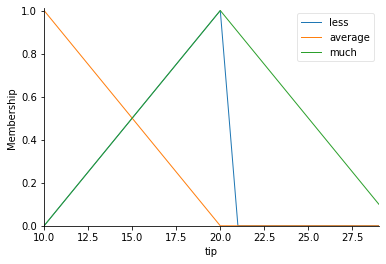

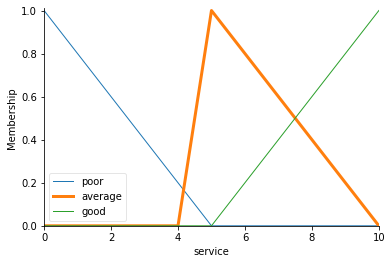

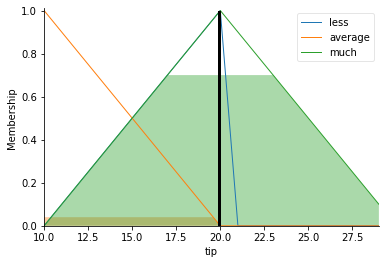

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,30,1), 'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[5,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[5,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])

tip['less']= fuzz.trimf(tip.universe,[10,20,20])
tip['average']= fuzz.trimf(tip.universe,[10,10,20])
tip['much']= fuzz.trimf(tip.universe,[10,20,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['average'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

62.728395061728385


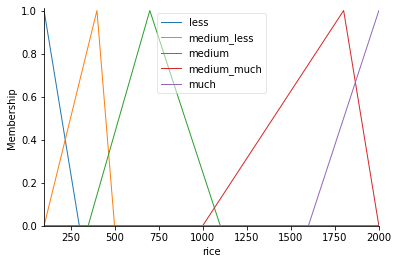

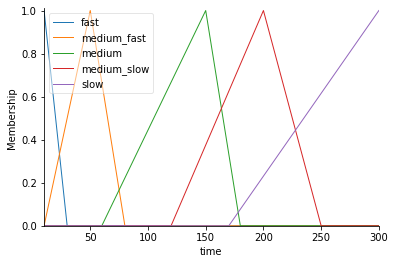

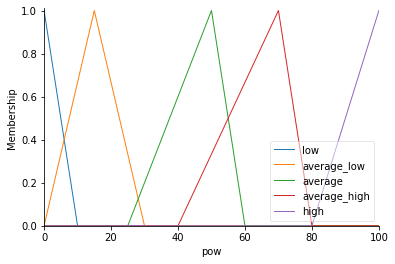

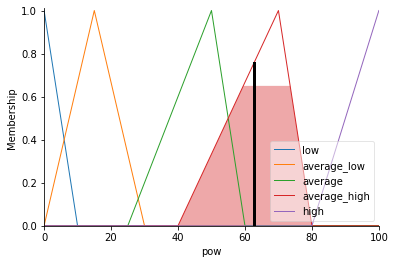

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

rice =ctrl.Antecedent(np.arange(100,2001,1),'rice')
time =ctrl.Antecedent(np.arange(10,301,1),'time')
pow = ctrl.Consequent(np.arange(0,101,1),'pow')
rice['less'] = fuzz.trimf(rice.universe,[100,100,300])
rice['medium_less'] = fuzz.trimf(rice.universe,[100,400,500])
rice['medium'] = fuzz.trimf(rice.universe,[350,700,1100])
rice['medium_much'] = fuzz.trimf(rice.universe,[1000,1800,2000])
rice['much'] = fuzz.trimf(rice.universe,[1600,2000,2000])

time['fast'] = fuzz.trimf(time.universe,[10,10,30])
time['medium_fast'] = fuzz.trimf(time.universe,[10,50,80])
time['medium'] = fuzz.trimf(time.universe,[60,150,180])
time['medium_slow'] = fuzz.trimf(time.universe,[120,200,250])
time['slow'] = fuzz.trimf(time.universe,[170,300,300])


pow['low'] = fuzz.trimf(pow.universe,[0,0,10])
pow['average_low'] = fuzz.trimf(pow.universe,[0,15,30])
pow['average'] = fuzz.trimf(pow.universe,[25,50,60])
pow['average_high'] = fuzz.trimf(pow.universe,[40,70,80])
pow['high'] = fuzz.trimf(pow.universe,[80,100,100])
rice.view()
time.view()
pow.view()

rule1 = ctrl.Rule(rice['less']&time['fast'],pow['average'])
rule2 = ctrl.Rule(rice['less']&time['medium_fast'],pow['average'])
rule3 = ctrl.Rule(rice['less']&time['medium'],pow['average_low'])
rule4 = ctrl.Rule(rice['less']&time['medium_slow'],pow['low'])
rule5 = ctrl.Rule(rice['less']&time['slow'],pow['low'])
rule6 = ctrl.Rule(rice['medium_less']&time['fast'],pow['average_high'])
rule7 = ctrl.Rule(rice['medium_less']&time['medium_fast'],pow['average'])
rule8 = ctrl.Rule(rice['medium_less']&time['medium'],pow['average'])
rule9 = ctrl.Rule(rice['medium_less']&time['medium_slow'],pow['average_low'])
rule10 = ctrl.Rule(rice['medium_less']&time['slow'],pow['low'])
rule11 = ctrl.Rule(rice['medium']&time['fast'],pow['average_high'])
rule12 = ctrl.Rule(rice['medium']&time['medium_fast'],pow['average_high'])
rule13 = ctrl.Rule(rice['medium']&time['medium'],pow['average_high'])
rule14 = ctrl.Rule(rice['medium']&time['medium_slow'],pow['average'])
rule15 = ctrl.Rule(rice['medium']&time['slow'],pow['average_low'])
rule16 = ctrl.Rule(rice['medium_much']&time['fast'],pow['high'])
rule17 = ctrl.Rule(rice['medium_much']&time['medium_fast'],pow['high'])
rule18 = ctrl.Rule(rice['medium_much']&time['medium'],pow['average_high'])
rule19 = ctrl.Rule(rice['medium_much']&time['medium_slow'],pow['average_high'])
rule20 = ctrl.Rule(rice['medium_much']&time['slow'],pow['average'])
rule21 = ctrl.Rule(rice['much']&time['fast'],pow['high'])
rule22 = ctrl.Rule(rice['much']&time['medium_fast'],pow['high'])
rule23 = ctrl.Rule(rice['much']&time['medium'],pow['high'])
rule24 = ctrl.Rule(rice['much']&time['medium_slow'],pow['average_high'])
rule25 = ctrl.Rule(rice['much']&time['slow'],pow['average_high'])
power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22, rule23,rule24,rule25])
power = ctrl.ControlSystemSimulation(power_ctrl)
power.input['rice'] = 840
power.input['time'] = 120
power.compute() 
print(power.output['pow'])
pow.view(sim = power)
rice =ctrl.Antecedent(np.arange(100,2010,10),'rice')
time =ctrl.Antecedent(np.arange(10,301,1),'time')
pow = ctrl.Consequent(np.arange(0,101,1),'pow')
